In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class Model(nn.Module):
    #input layer ( 4  features of the flower)-->
    #hidden layer1(number of neurons) -->
    #H2(n)--> 
    #output(3 classes of iris flowers).

    def __init__(self,in_features=4,h1=8,h2=9 ,out_features=3):
        super().__init__()#instantiate our nn.module
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1 ,h2)
        self.out=nn.Linear(h2,out_features)
    

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
    

In [50]:
torch.manual_seed(41)

#careate an instance of model

model=Model()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
 

In [52]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df =pd.read_csv(url)

In [53]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
my_df['species'] =my_df['species'].replace('setosa',0.0)
my_df['species'] =my_df['species'].replace('versicolor',1.0)
my_df['species'] =my_df['species'].replace('virginica',2.0)
my_df
#change last colum from strings to intiger

C:\Users\Admin\AppData\Local\Temp\ipykernel_19284\2942982774.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] =my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [55]:
#train test split ! set x,y
X= my_df.drop('species',axis=1)
y=my_df['species']

In [56]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [58]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#train test split
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=41)

In [61]:
#convert X features to float tensors 
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)



In [62]:
#convert y labels to long tensors 
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [63]:
#convert y labels to long tensors 
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [64]:
# CrossEntropyLoss for classification problems
criterion = nn.CrossEntropyLoss()

# Adam optimizer with learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [65]:
model.parameters()

<generator object Module.parameters at 0x000002C34CA05460>

Epoch 0, Loss: 1.1251550912857056
Epoch 100, Loss: 0.9593889713287354
Epoch 200, Loss: 0.6083163619041443
Epoch 300, Loss: 0.36295172572135925
Epoch 400, Loss: 0.22098350524902344
Epoch 500, Loss: 0.13665440678596497
Epoch 600, Loss: 0.0886123925447464
Epoch 700, Loss: 0.052640534937381744
Epoch 800, Loss: 0.038575224578380585
Epoch 900, Loss: 0.03146129474043846
Epoch 1000, Loss: 0.02708813175559044
Epoch 1100, Loss: 0.02402896247804165
Epoch 1200, Loss: 0.02171093039214611
Epoch 1300, Loss: 0.019827445968985558
Epoch 1400, Loss: 0.018228810280561447
Epoch 1500, Loss: 0.016817281022667885
Epoch 1600, Loss: 0.01553546916693449
Epoch 1700, Loss: 0.014350197277963161
Epoch 1800, Loss: 0.013238037005066872
Epoch 1900, Loss: 0.01219039224088192


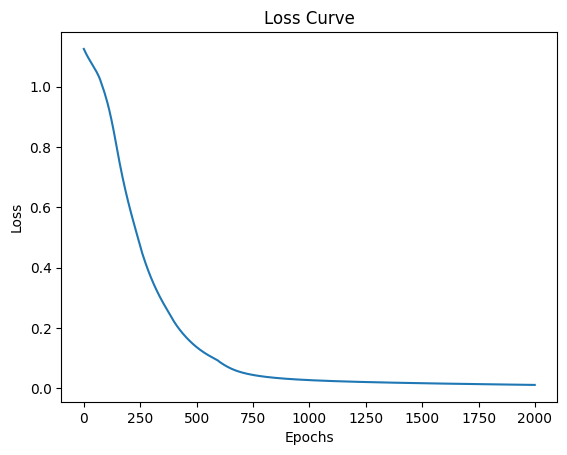

In [66]:
# Training parameters
epochs = 2000
losses = []

for epoch in range(epochs):
    # Forward pass: Get predictions
    y_pred = model(X_train)
    
    # Compute the loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # Zero gradients from the previous step
    optimizer.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


In [67]:
#evulate model on test data set
with torch.no_grad(): #basically turn off back propgation
    y_eval = model.forward(X_test) #x_test are features from our test set,y_eval will be predection
    loss=criterion(y_eval ,y_test)# find the loss or error 

In [68]:
loss

tensor(0.2111)

In [69]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        # Reshape data to (1, 4) to match the model's input expectations
        data = data.unsqueeze(0)  # Add a batch dimension

        # Forward pass
        y_val = model(data)

        # Map the true class label to its name
        if y_test[i].item() == 0:
            true_label = "setosa"
        elif y_test[i].item() == 1:
            true_label = "versicolor"
        else:
            true_label = "virginica"

        # Predicted class
        predicted_class = y_val.argmax().item()

        # Print the raw logits, true label, and predicted class
        print(f"{i+1}.) {y_val} \t True: {true_label} \t Predicted: {predicted_class}")

        # Check if the prediction is correct
        if predicted_class == y_test[i].item():
            correct += 1

print(f"We got {correct} correct")


1.) tensor([[-4.4523,  1.9546,  8.0203]]) 	 True: virginica 	 Predicted: 2
2.) tensor([[-5.7928, -0.3396, 13.1082]]) 	 True: virginica 	 Predicted: 2
3.) tensor([[-6.7872,  0.1785, 14.4805]]) 	 True: virginica 	 Predicted: 2
4.) tensor([[-2.5443,  8.1789, -3.3500]]) 	 True: versicolor 	 Predicted: 1
5.) tensor([[-5.5910,  1.0204, 11.2710]]) 	 True: virginica 	 Predicted: 2
6.) tensor([[-1.4542,  9.3313, -6.9017]]) 	 True: versicolor 	 Predicted: 1
7.) tensor([[-4.4929,  3.1006,  6.6919]]) 	 True: virginica 	 Predicted: 2
8.) tensor([[-2.4166,  8.1812, -3.6097]]) 	 True: versicolor 	 Predicted: 1
9.) tensor([[-5.0263,  1.7041,  9.4507]]) 	 True: virginica 	 Predicted: 2
10.) tensor([[-6.1985, -0.4692, 14.0348]]) 	 True: virginica 	 Predicted: 2
11.) tensor([[-4.1255,  3.6514,  5.2948]]) 	 True: virginica 	 Predicted: 2
12.) tensor([[ 15.4244,   4.3095, -31.5087]]) 	 True: setosa 	 Predicted: 0
13.) tensor([[ 14.2150,   3.9465, -28.9308]]) 	 True: setosa 	 Predicted: 0
14.) tensor([[-0.0

In [70]:
new_iris = torch.tensor([4.7,3.2,1.3,0.7])

In [71]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 12.0364,   5.1418, -26.4429])


In [72]:
newer_iris =torch.tensor([5.9,3.0,5.1,1.8])

In [73]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-4.3802,  1.7720,  8.1146])


In [80]:
torch.save(model.state_dict(),'my_really_awsome_iris_model.pt')

In [84]:
new_model = Model()
new_model.load_state_dict(torch.load ('my_really_awsome_iris_model.pt'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_19284\3399276648.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load ('my_really_awsome_iris

<All keys matched successfully>

In [82]:
# Set the model to evaluation mode
new_model.eval()

# Print the model structure
print(new_model)


Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)
